In [40]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

### I) Define a function named *get_lower_and_upper_bounds* that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [21]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    iqr_range = series.quantile(.75)-series.quantile(.25)
    lower_bound = series.quantile(.25) - (iqr_range * multiplier)
    upper_bound = series.quantile(.75) + (iqr_range * multiplier)
    return lower_bound,upper_bound

1) Using lemonade.csv dataset and focusing on continuous variables:

In [22]:
lemon = pd.read_csv('lemonade.csv')
lemon.columns = [col.lower() for col in lemon]
lemon.date = pd.to_datetime(lemon.date)
lemon.head()

,date,day,temperature,rainfall,flyers,price,sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18


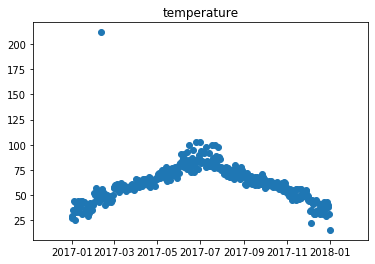

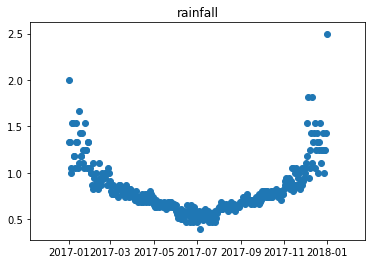

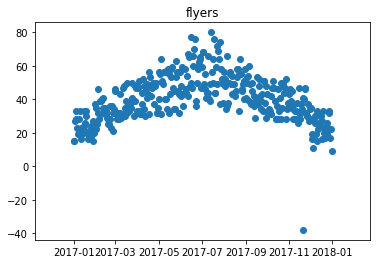

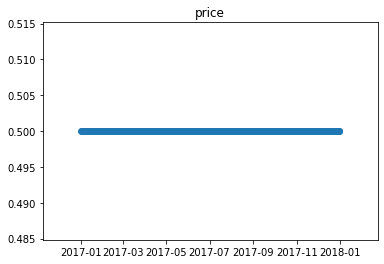

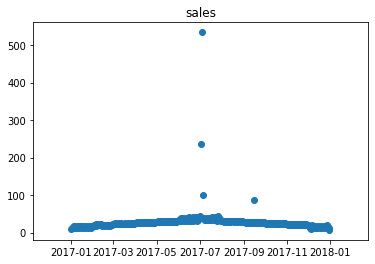

In [46]:
for col in lemon.select_dtypes([float,int]).columns:
    plt.scatter(x = lemon.date, y = lemon[col])
    plt.title(col)
    plt.show()

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [38]:
for col in lemon.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(lemon[col])
    print(col)
    print(lemon[col][(lemon[col] < lower)], '\n')

temperature
364    15.1
Name: temperature, dtype: float64 

rainfall
Series([], Name: rainfall, dtype: float64) 

flyers
324   -38
Name: flyers, dtype: int64 

price
Series([], Name: price, dtype: float64) 

sales
Series([], Name: sales, dtype: int64) 



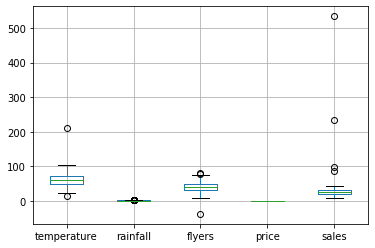

In [41]:
lemon.boxplot()

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?